# IMPORT LIBRARIES

In [85]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import seaborn as sns

# DATA UNDERSTANDING

## Import Data

In [86]:
# load dataset 
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)
path = 'loan_data_2007_2014.csv'
df = pd.read_csv(path, index_col=0)

print("shape of the data : ", df.shape)
df.head(5)

shape of the data :  (466285, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check Data Info

In [87]:
# Data Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

# DATA UNDERSTANDING

## Drop Coloumn

In [88]:
# Defining columns will be dropped
cols_to_drop = [
    # unique id
    'id',
    'member_id',
    
    # free text
    'url',
    'desc',
    
    # all null / constant / others
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',
    
    # expert judgment
    'sub_grade'
]

In [89]:
df.drop(cols_to_drop, axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status        

In [90]:
percentage_loan_status = df.loan_status.value_counts(normalize=True)*100

print(percentage_loan_status)

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


In [91]:
bad_status = [
    'Charged Off',
    'Default',
    'Does Not Meet The Credit Policy/ Status:Charged Off',
    'Late (31-120 days)'
]

df['bad_flag'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [92]:
percentage_bad_flag = df['bad_flag'].value_counts(normalize=True) * 100

print(percentage_bad_flag)

bad_flag
0    89.232551
1    10.767449
Name: proportion, dtype: float64


In [93]:
df.drop('loan_status', axis=1, inplace=True)

## Data Cleaning

In [94]:
# Data Cleaning
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [95]:
df['emp_length_int'] = df['emp_length'].str.replace(r'[^0-9]', '+', '').astype(float)

In [96]:
df.drop('emp_length', axis=1, inplace=True)

In [97]:
unique_terms = df['term'].unique()
print(unique_terms)

[' 36 months' ' 60 months']


In [98]:
df['term_int'] = df['term'].str.replace('months', '').astype(float)

In [99]:
df.drop('term', axis=1, inplace=True)

In [100]:
print(df['earliest_cr_line'].head(3))

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object


In [101]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
print(df['earliest_cr_line_date'].head(3))

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [102]:
df['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').year - df['earliest_cr_line_date'].dt.year) * 12 + \
                                    (pd.to_datetime('2017-12-01').month - df['earliest_cr_line_date'].dt.month)

print(df['mths_since_earliest_cr_line'].head(3))

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64


In [103]:
print(df['mths_since_earliest_cr_line'].describe())

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [104]:
print(df[df['mths_since_earliest_cr_line'] < 0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3))

     earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                       -537.0
1770           Sep-68            2068-09-01                       -609.0
2799           Sep-64            2064-09-01                       -561.0


In [105]:
df.loc[df['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [106]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [107]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [108]:
df['mths_since_issue_d'] = (pd.to_datetime('2017-12-01').year - df['issue_d_date'].dt.year) * 12 + \
                           (pd.to_datetime('2017-12-01').month - df['issue_d_date'].dt.month)

In [109]:
print(df['mths_since_issue_d'].describe())

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64


In [110]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [111]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y', errors='coerce')

df['mths_since_last_pymnt_d'] = (pd.to_datetime('2017-12-01').year - df['last_pymnt_d_date'].dt.year) * 12 + \
                                (pd.to_datetime('2017-12-01').month - df['last_pymnt_d_date'].dt.month)

In [112]:
print(df['mths_since_last_pymnt_d'].describe())

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64


In [113]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [114]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y', errors='coerce')

df['mths_since_next_pymnt_d'] = (pd.to_datetime('2017-12-01').year - df['next_pymnt_d_date'].dt.year) * 12 + \
                                (pd.to_datetime('2017-12-01').month - df['next_pymnt_d_date'].dt.month)

In [115]:
print(df['mths_since_next_pymnt_d'].describe())

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64


In [116]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [117]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y', errors='coerce')

df['mths_since_last_credit_pull_d'] = (pd.to_datetime('2017-12-01').year - df['last_credit_pull_d_date'].dt.year) * 12 + \
                                      (pd.to_datetime('2017-12-01').month - df['last_credit_pull_d_date'].dt.month)

In [118]:
print(df['mths_since_last_credit_pull_d'].describe())

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [119]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

In [120]:
print(df.select_dtypes(include='object').nunique())

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64


In [121]:
df.drop(['emp_title', 'title', 'application_type' ], axis=1, inplace=True)

In [122]:
print(df.select_dtypes(exclude='object').nunique())

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
int_rate                            506
installment                       55622
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808
recoveries                        22773
collection_recovery_fee           20275


In [123]:
df.drop(['policy_code'], axis=1, inplace=True)

In [124]:
for col in df.select_dtypes(include='object').columns.tolist():
    print("Distribute Value For Feature", col)
    print(df[col].value_counts(normalize=True) * 100)
    print('\n')

Distribute Value For Feature grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


Distribute Value For Feature home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


Distribute Value For Feature verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


Distribute Value For Feature pymnt_plan
pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


Distribute Value For Feature purpose
purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical            

In [125]:
df.drop('pymnt_plan', axis=1, inplace=True)

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


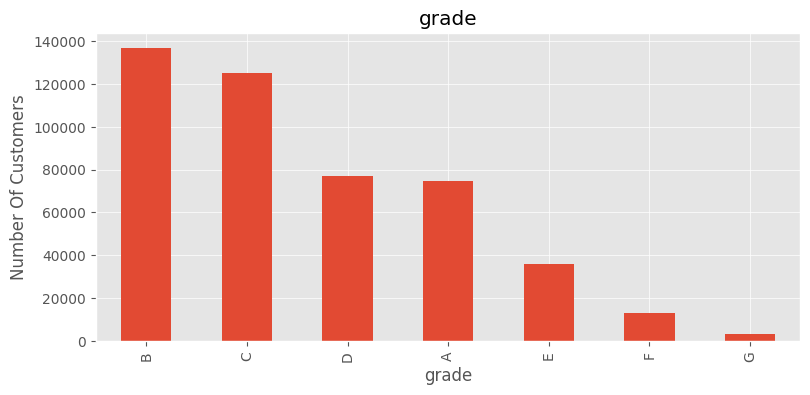

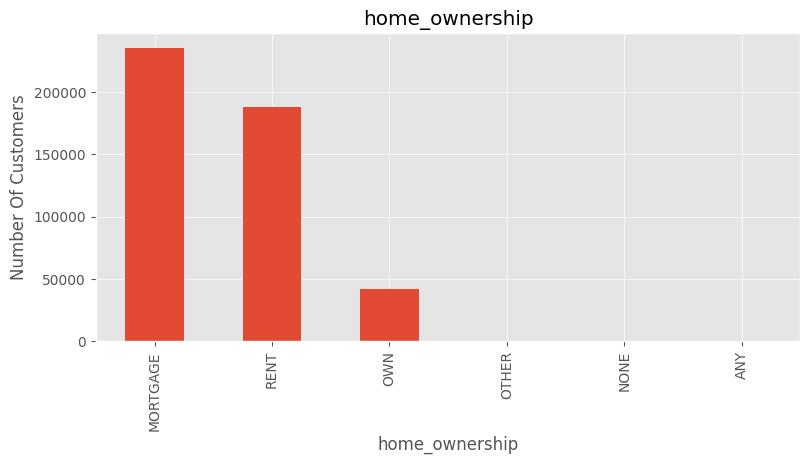

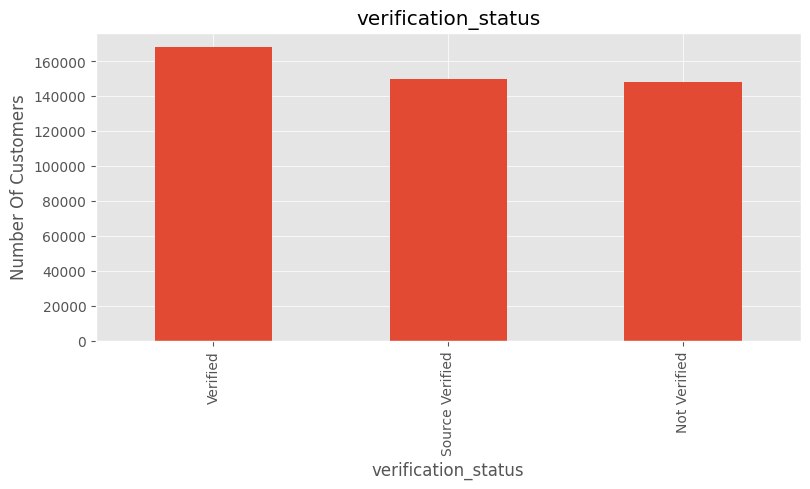

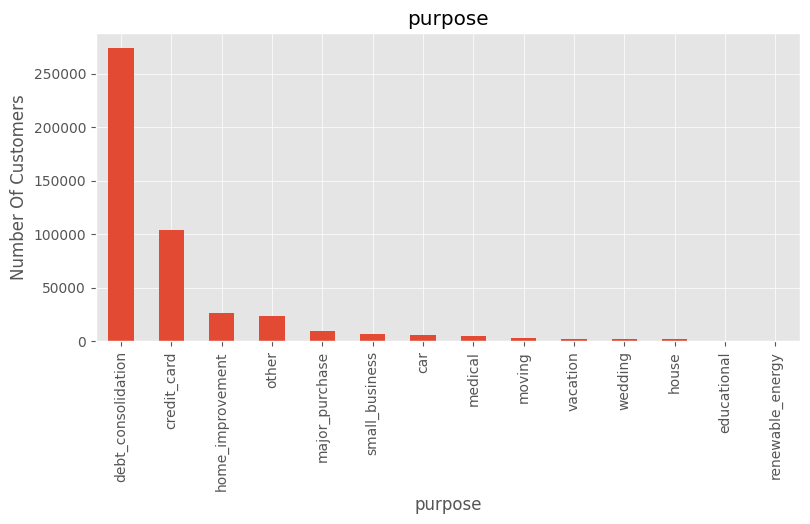

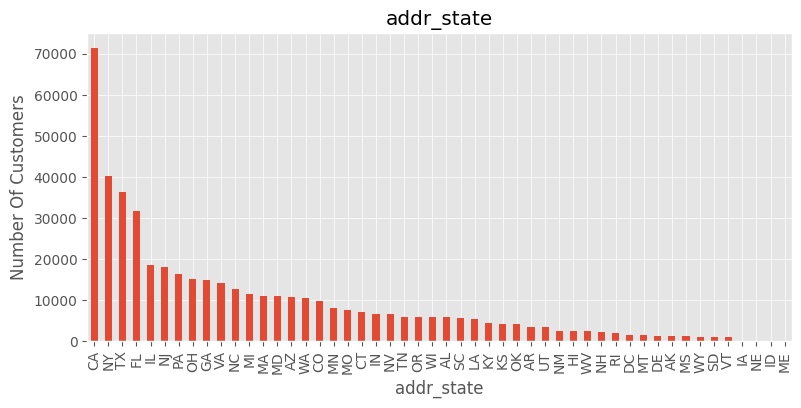

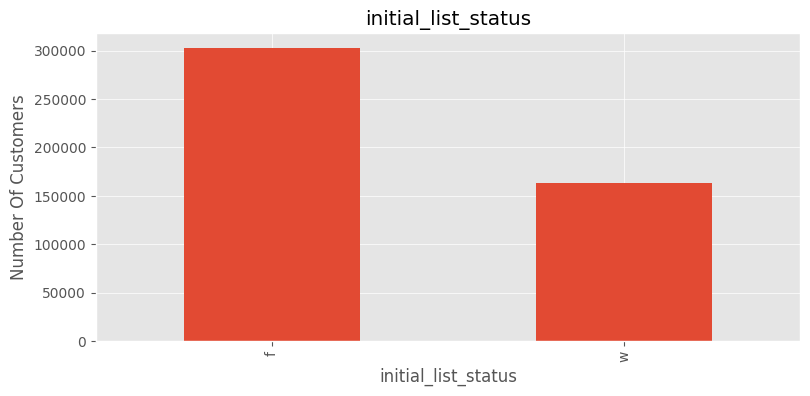

In [126]:
cat_var = df.select_dtypes(include=["object"]).columns
print(cat_var)

plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Number Of Customers")
    plt.title(column)

In [127]:
num_var = df.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,0.0,0.0,0,NaN,36.0,395.0,72,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,0.0,0.0,1,NaN,60.0,224.0,72,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,0.0,0.0,0,NaN,36.0,193.0,72,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,0.0,0.0,0,NaN,36.0,262.0,72,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,0.0,0.0,0,NaN,60.0,263.0,72,23.0,22.0,23.0



Summary Statistics of loan_amnt
Mean    : 14317.28
Std     : 8286.51
Median  : 12000.00
Mode    : 10000


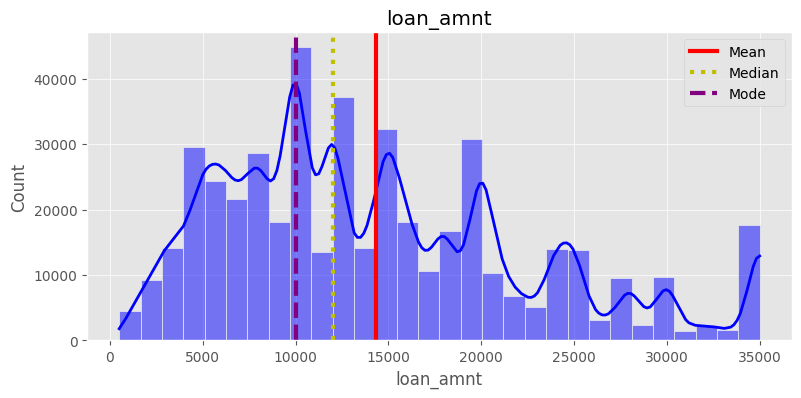


Summary Statistics of funded_amnt
Mean    : 14291.80
Std     : 8274.37
Median  : 12000.00
Mode    : 10000


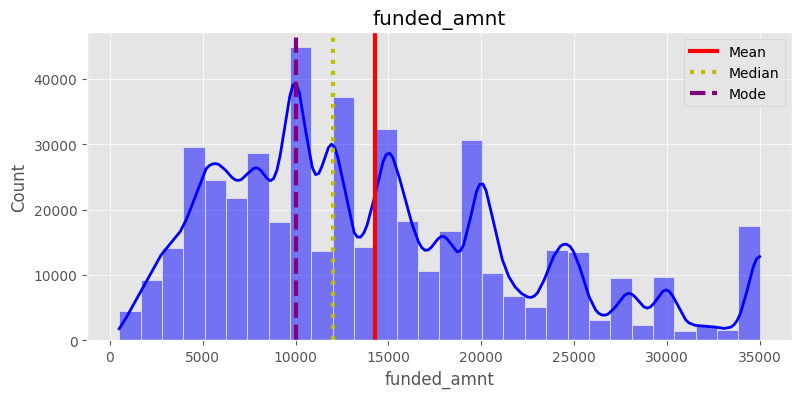


Summary Statistics of funded_amnt_inv
Mean    : 14222.33
Std     : 8297.64
Median  : 12000.00
Mode    : 10000.0


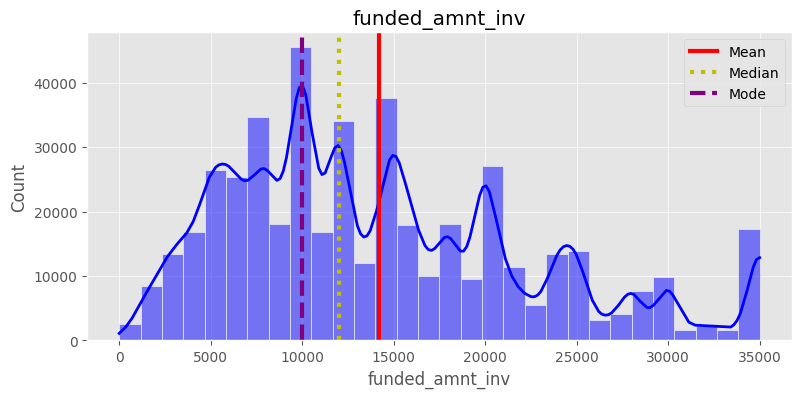


Summary Statistics of int_rate
Mean    : 13.83
Std     : 4.36
Median  : 13.66
Mode    : 12.99


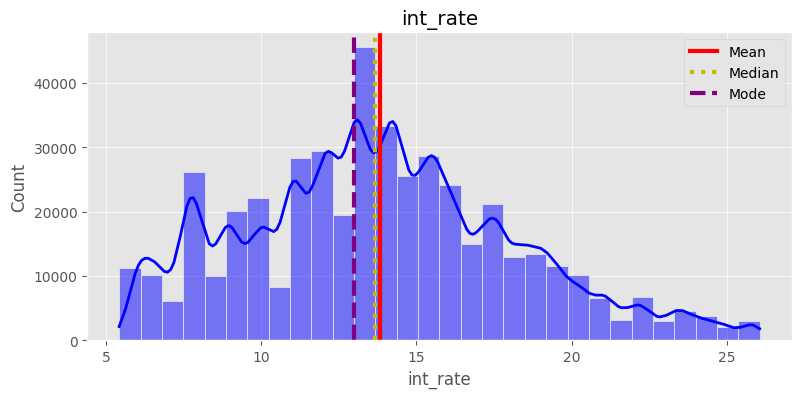


Summary Statistics of installment
Mean    : 432.06
Std     : 243.49
Median  : 379.89
Mode    : 327.34


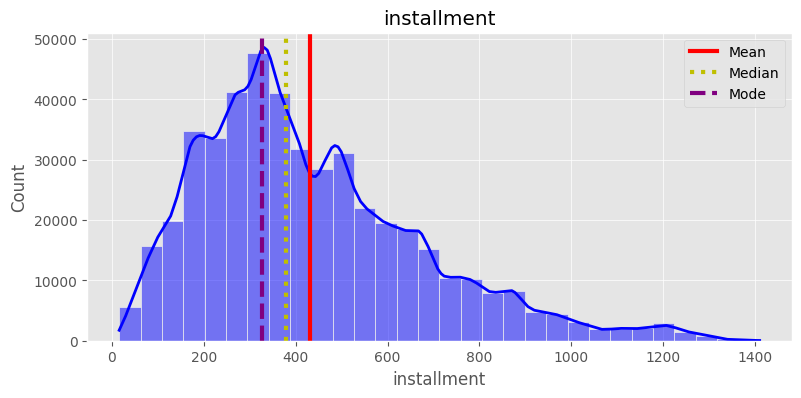


Summary Statistics of annual_inc
Mean    : 73277.38
Std     : 54963.57
Median  : 63000.00
Mode    : 60000.0


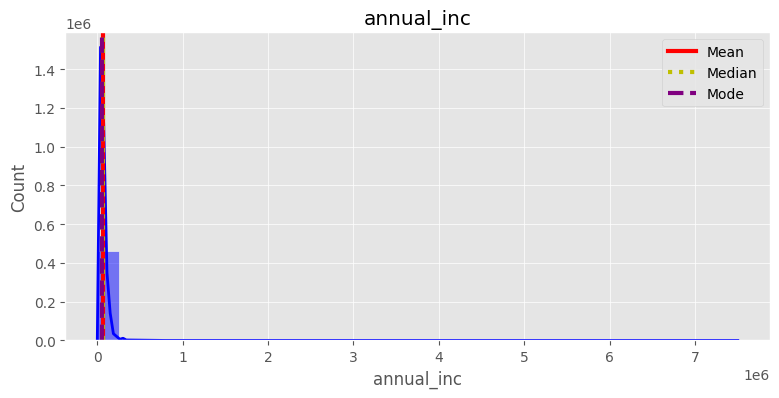


Summary Statistics of dti
Mean    : 17.22
Std     : 7.85
Median  : 16.87
Mode    : 14.4


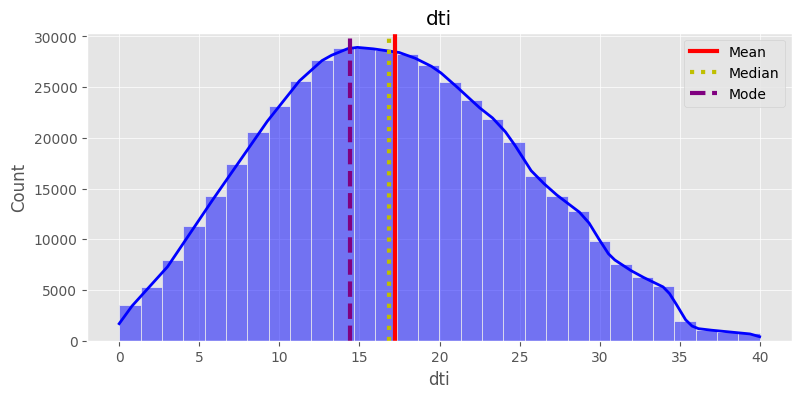


Summary Statistics of delinq_2yrs
Mean    : 0.28
Std     : 0.80
Median  : 0.00
Mode    : 0.0


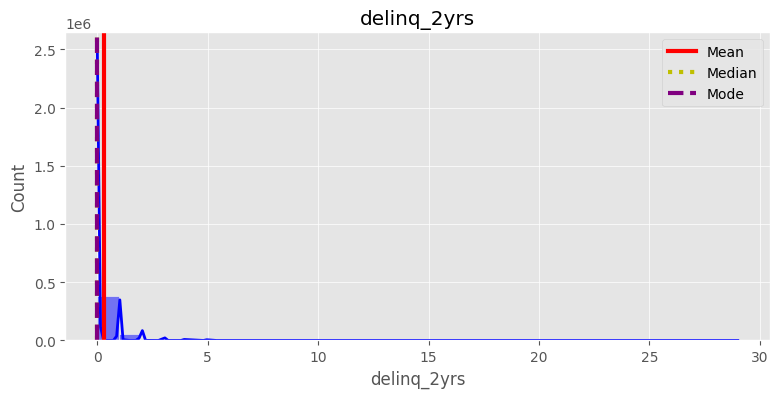


Summary Statistics of inq_last_6mths
Mean    : 0.80
Std     : 1.09
Median  : 0.00
Mode    : 0.0


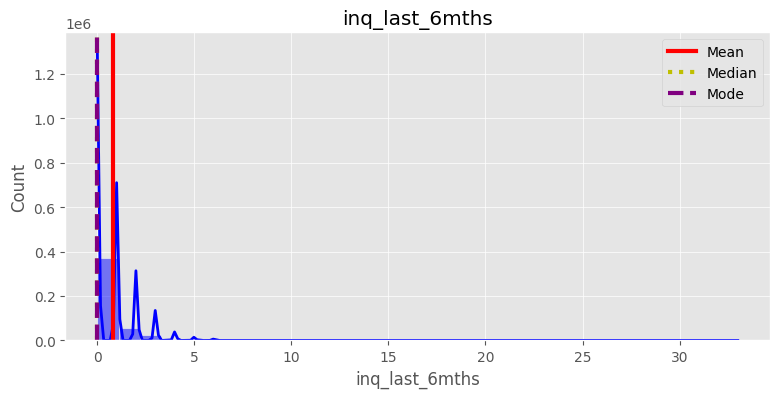


Summary Statistics of mths_since_last_delinq
Mean    : 34.10
Std     : 21.78
Median  : 31.00
Mode    : 9.0


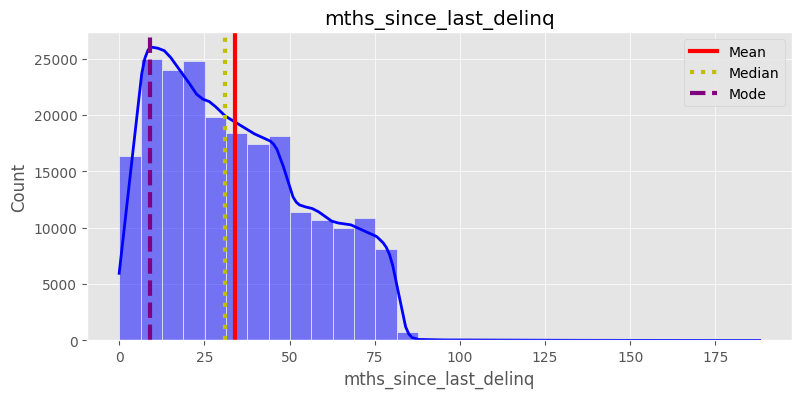


Summary Statistics of mths_since_last_record
Mean    : 74.31
Std     : 30.36
Median  : 76.00
Mode    : 0.0


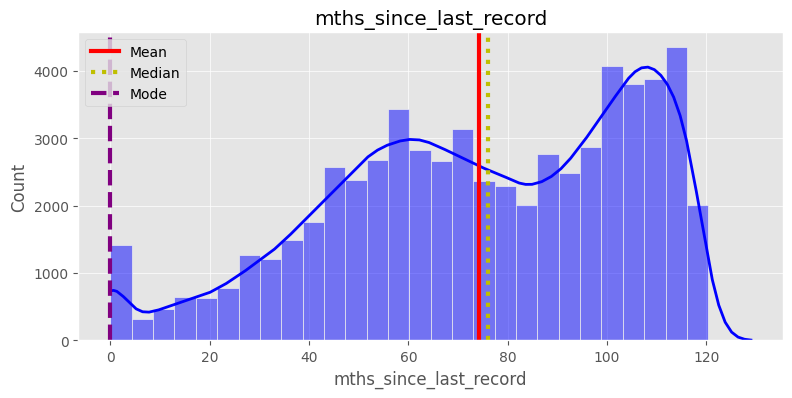


Summary Statistics of open_acc
Mean    : 11.19
Std     : 4.99
Median  : 10.00
Mode    : 9.0


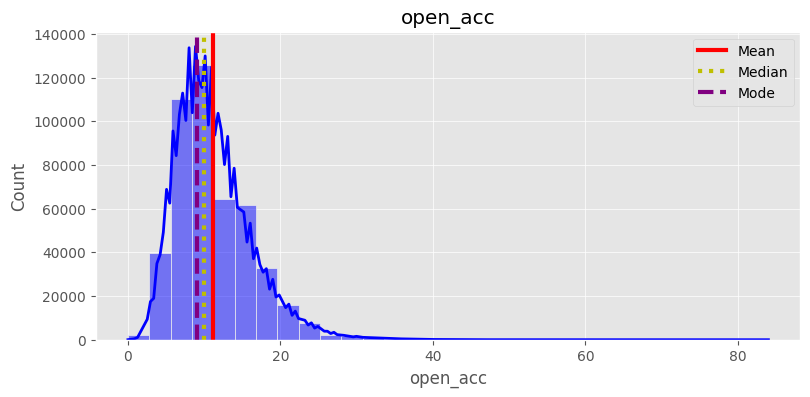


Summary Statistics of pub_rec
Mean    : 0.16
Std     : 0.51
Median  : 0.00
Mode    : 0.0


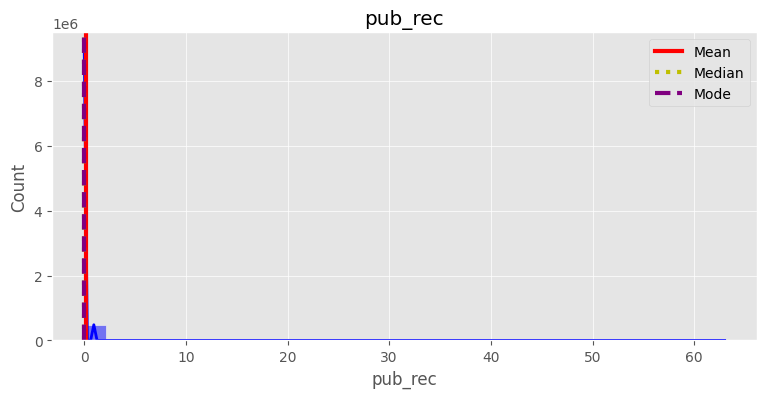


Summary Statistics of revol_bal
Mean    : 16230.20
Std     : 20676.25
Median  : 11764.00
Mode    : 0


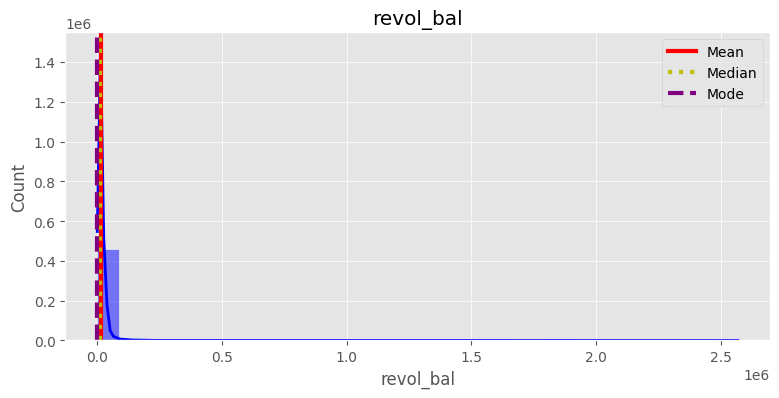


Summary Statistics of revol_util
Mean    : 56.18
Std     : 23.73
Median  : 57.60
Mode    : 0.0


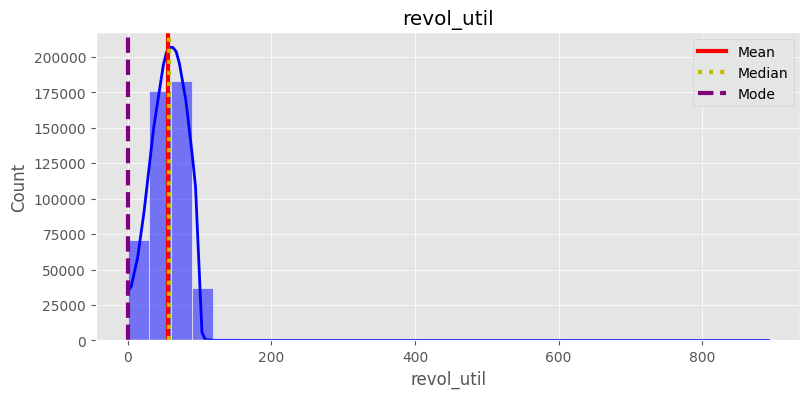


Summary Statistics of total_acc
Mean    : 25.06
Std     : 11.60
Median  : 23.00
Mode    : 21.0


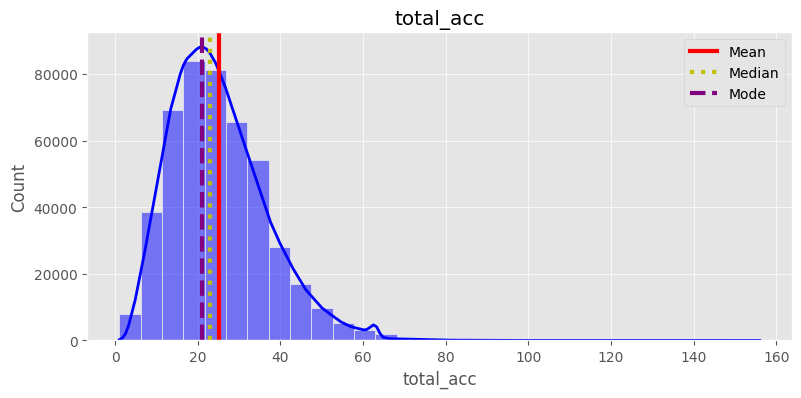


Summary Statistics of out_prncp
Mean    : 4410.06
Std     : 6355.08
Median  : 441.47
Mode    : 0.0


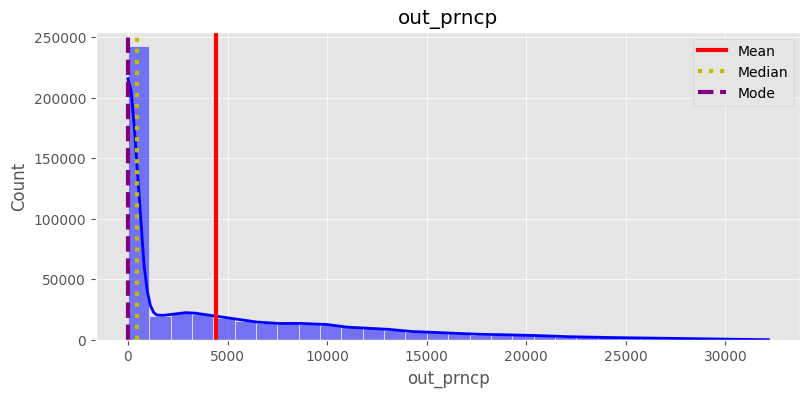


Summary Statistics of out_prncp_inv
Mean    : 4408.45
Std     : 6353.20
Median  : 441.38
Mode    : 0.0


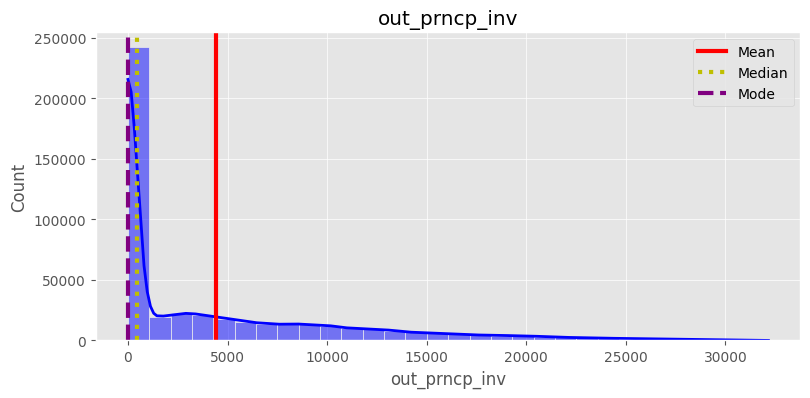


Summary Statistics of total_pymnt
Mean    : 11540.69
Std     : 8265.63
Median  : 9419.25
Mode    : 6743.73


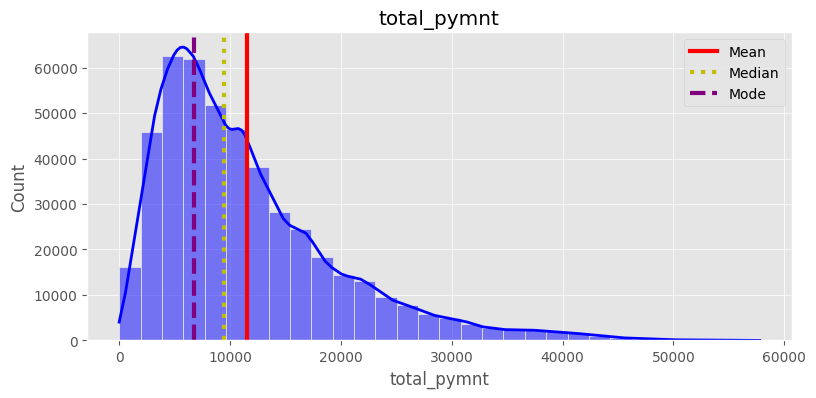


Summary Statistics of total_pymnt_inv
Mean    : 11469.89
Std     : 8254.16
Median  : 9355.43
Mode    : 0.0


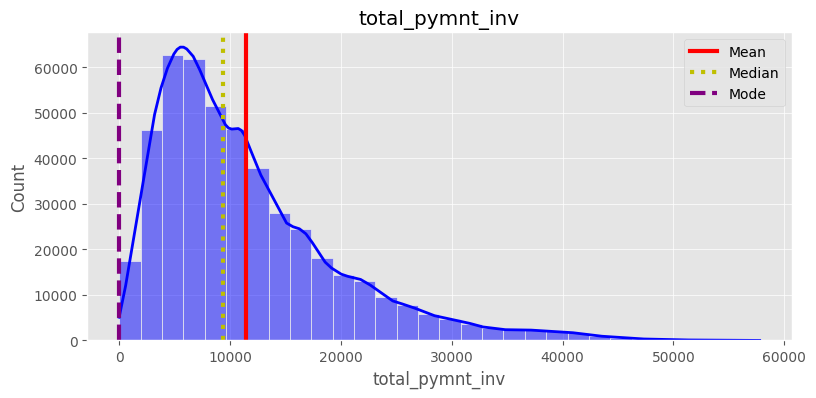


Summary Statistics of total_rec_prncp
Mean    : 8866.01
Std     : 7031.69
Median  : 6817.76
Mode    : 10000.0


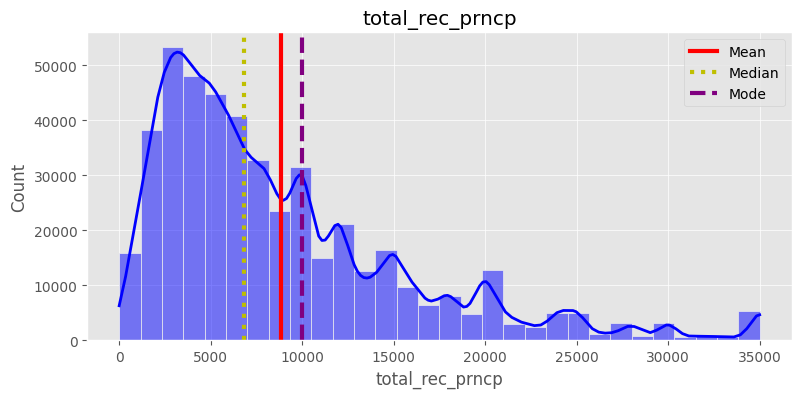


Summary Statistics of total_rec_int
Mean    : 2588.68
Std     : 2483.81
Median  : 1818.88
Mode    : 0.0


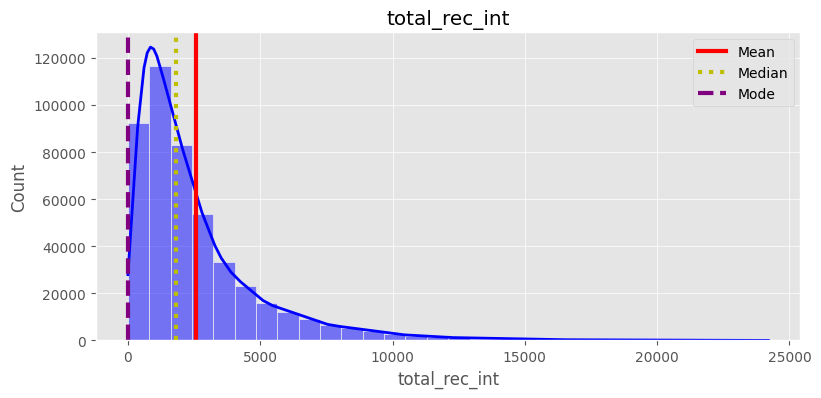


Summary Statistics of total_rec_late_fee
Mean    : 0.65
Std     : 5.27
Median  : 0.00
Mode    : 0.0


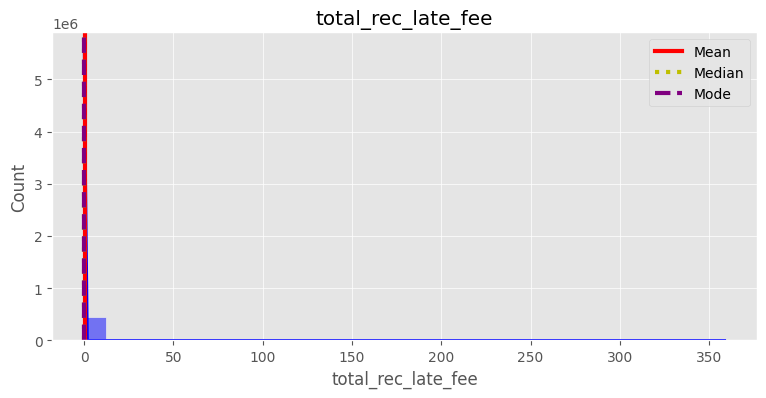


Summary Statistics of recoveries
Mean    : 85.34
Std     : 552.22
Median  : 0.00
Mode    : 0.0


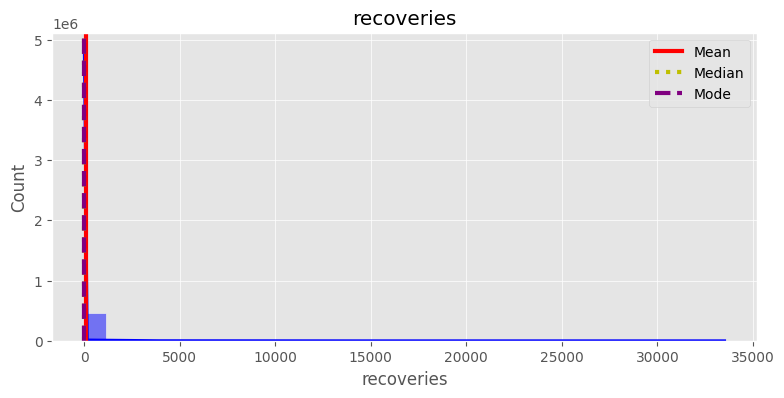


Summary Statistics of collection_recovery_fee
Mean    : 8.96
Std     : 85.49
Median  : 0.00
Mode    : 0.0


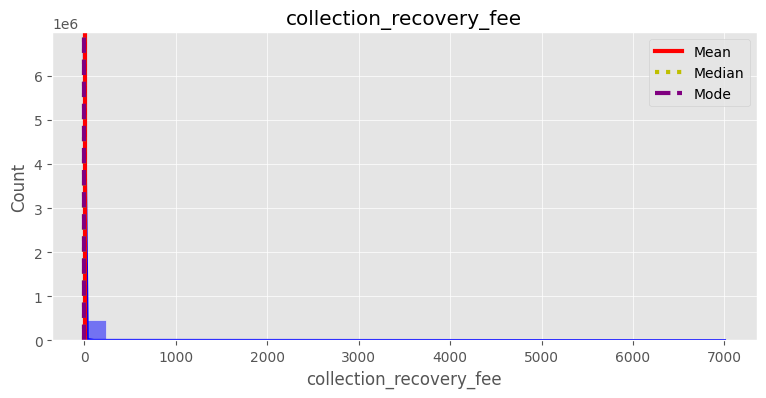


Summary Statistics of last_pymnt_amnt
Mean    : 3123.91
Std     : 5554.74
Median  : 545.96
Mode    : 327.34


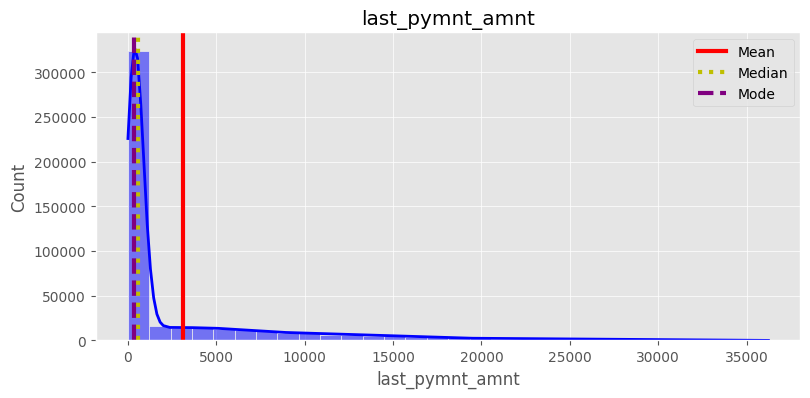


Summary Statistics of collections_12_mths_ex_med
Mean    : 0.01
Std     : 0.11
Median  : 0.00
Mode    : 0.0


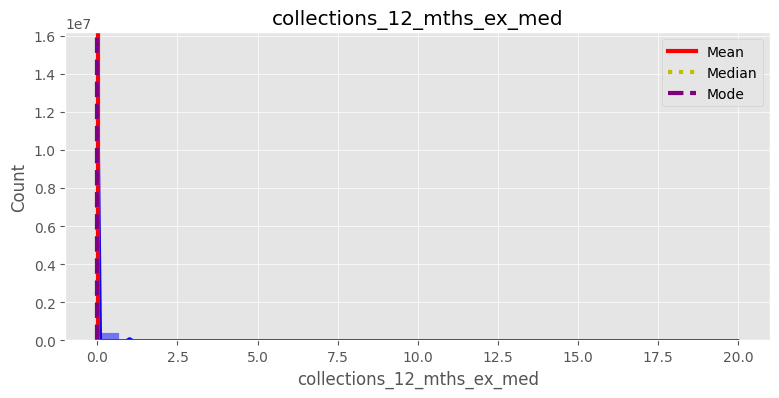


Summary Statistics of acc_now_delinq
Mean    : 0.00
Std     : 0.07
Median  : 0.00
Mode    : 0.0


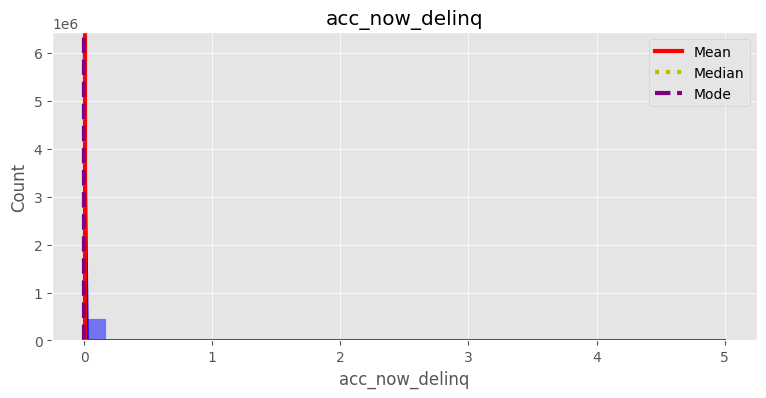


Summary Statistics of bad_flag
Mean    : 0.11
Std     : 0.31
Median  : 0.00
Mode    : 0


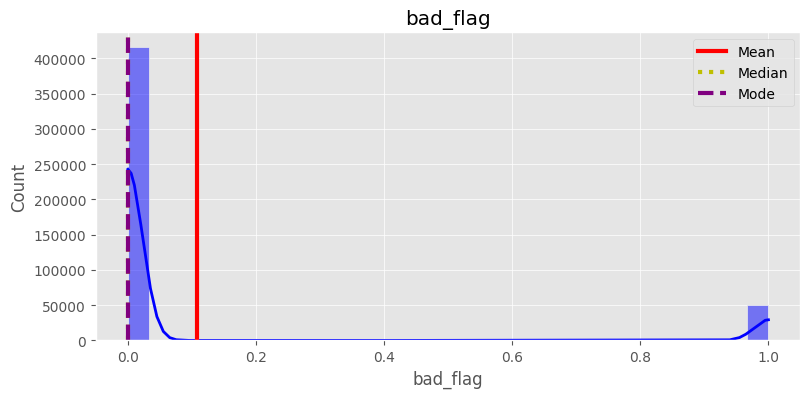


Summary Statistics of emp_length_int
Null Data or Only NaN.

Summary Statistics of term_int
Mean    : 42.61
Std     : 10.72
Median  : 36.00
Mode    : 36.0


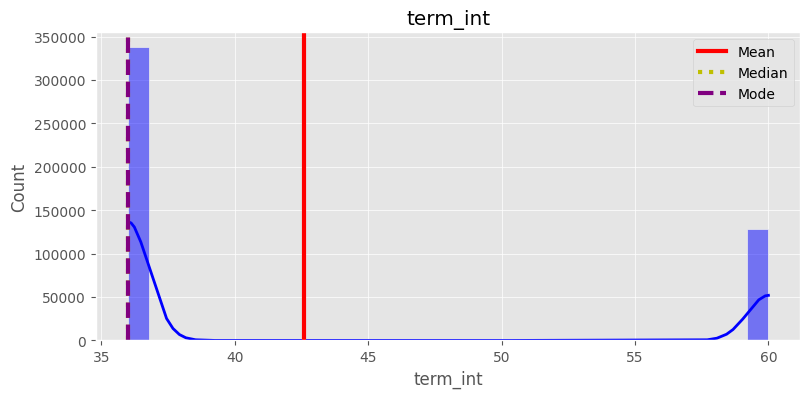


Summary Statistics of mths_since_earliest_cr_line
Mean    : 242.39
Std     : 86.46
Median  : 226.00
Mode    : 206.0


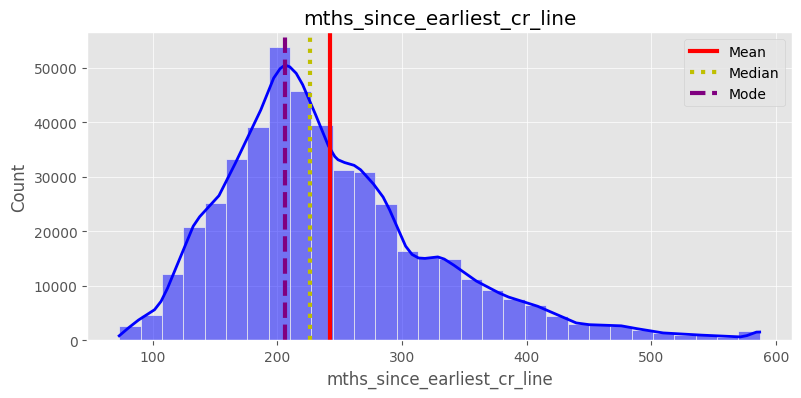


Summary Statistics of mths_since_issue_d
Mean    : 51.26
Std     : 14.34
Median  : 47.00
Mode    : 38


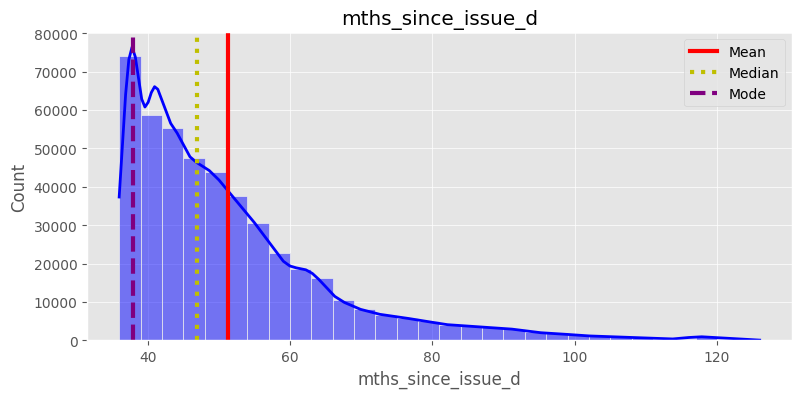


Summary Statistics of mths_since_last_pymnt_d
Mean    : 31.29
Std     : 12.81
Median  : 24.00
Mode    : 23.0


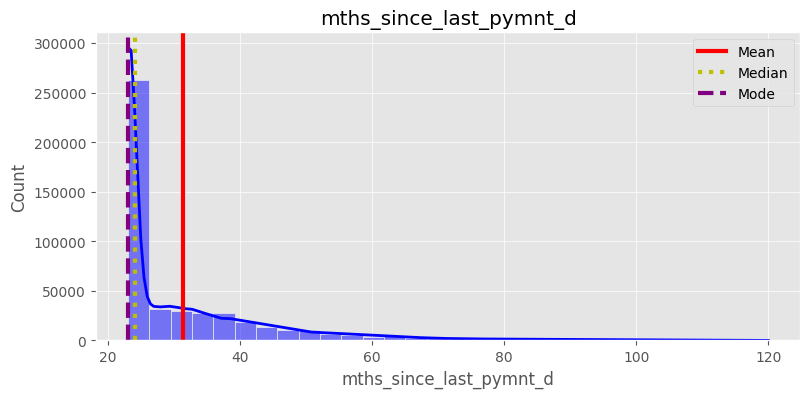


Summary Statistics of mths_since_next_pymnt_d
Mean    : 22.74
Std     : 6.08
Median  : 22.00
Mode    : 22.0


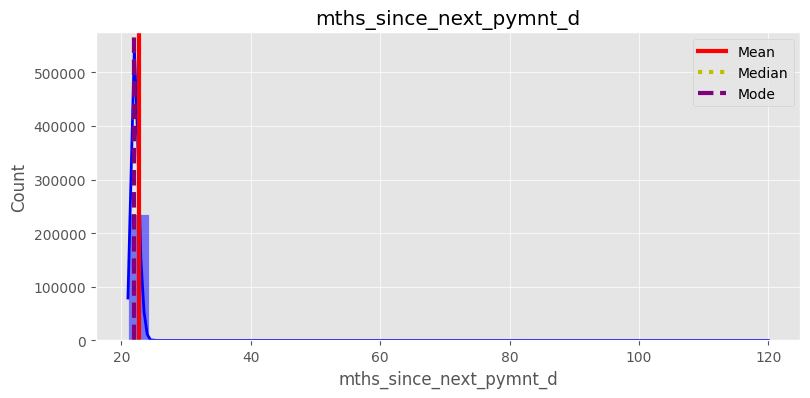


Summary Statistics of mths_since_last_credit_pull_d
Mean    : 27.05
Std     : 9.64
Median  : 23.00
Mode    : 23.0


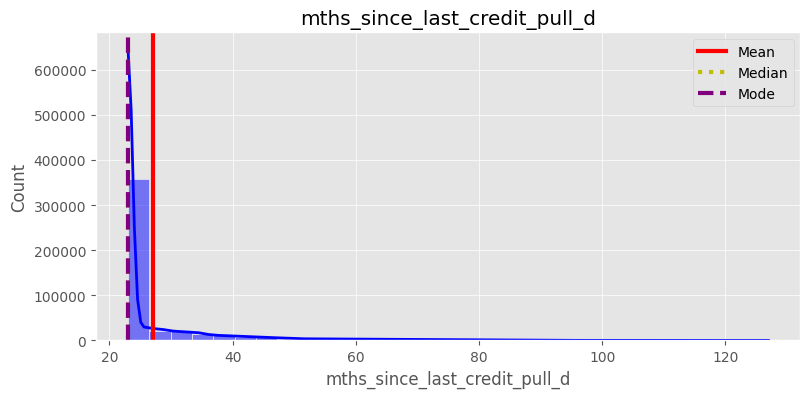

In [128]:
plt.style.use("ggplot")

for column in df.select_dtypes(exclude='object').columns.tolist():
    clean_data = df[column].dropna()

    if clean_data.empty: 
        print(f'\nSummary Statistics of {column}')
        print('Null Data or Only NaN.')
        continue  

    average = clean_data.mean()
    median = clean_data.median()
    mode = clean_data.mode().iloc[0] if not clean_data.mode().empty else None
    std = clean_data.std()

    plt.figure(figsize=(20, 4))

    plt.subplot(121)
    sns.histplot(clean_data, kde=True, bins=30, color="blue")
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
    if mode is not None:
        plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label='Mode')
    plt.legend()
    plt.title(column)

    print(f'\nSummary Statistics of {column}')
    print(f'Mean    : {average:.2f}')
    print(f'Std     : {std:.2f}')
    print(f'Median  : {median:.2f}')
    print(f'Mode    : {mode}')

    plt.show()  
    plt.close('all')  

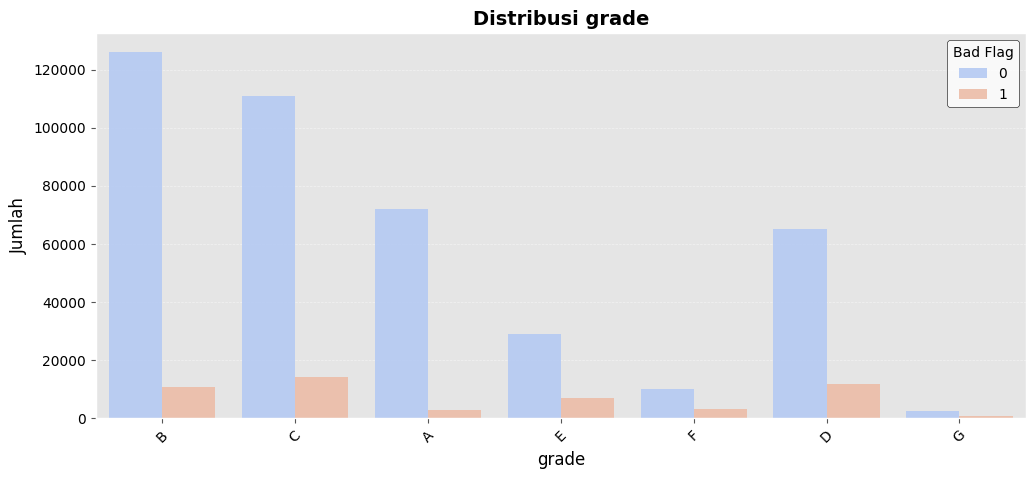

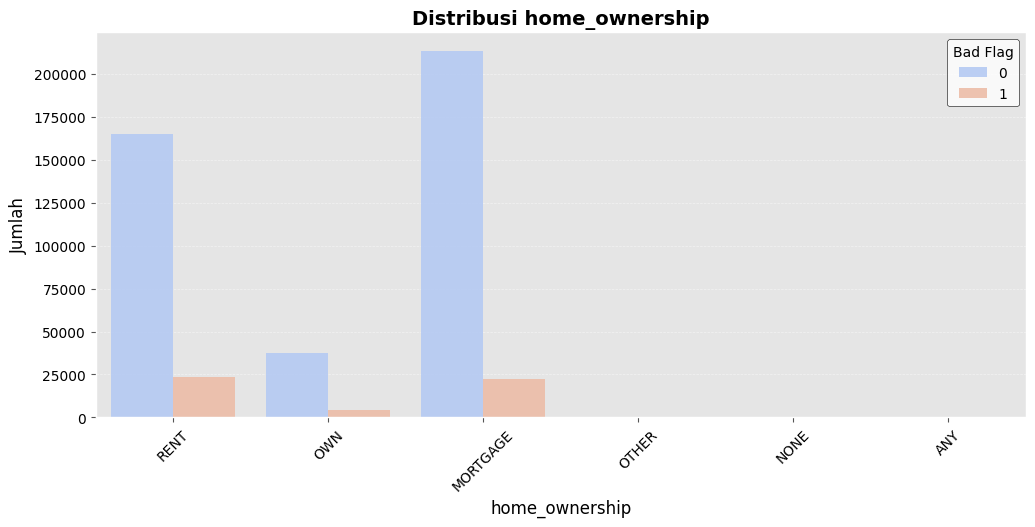

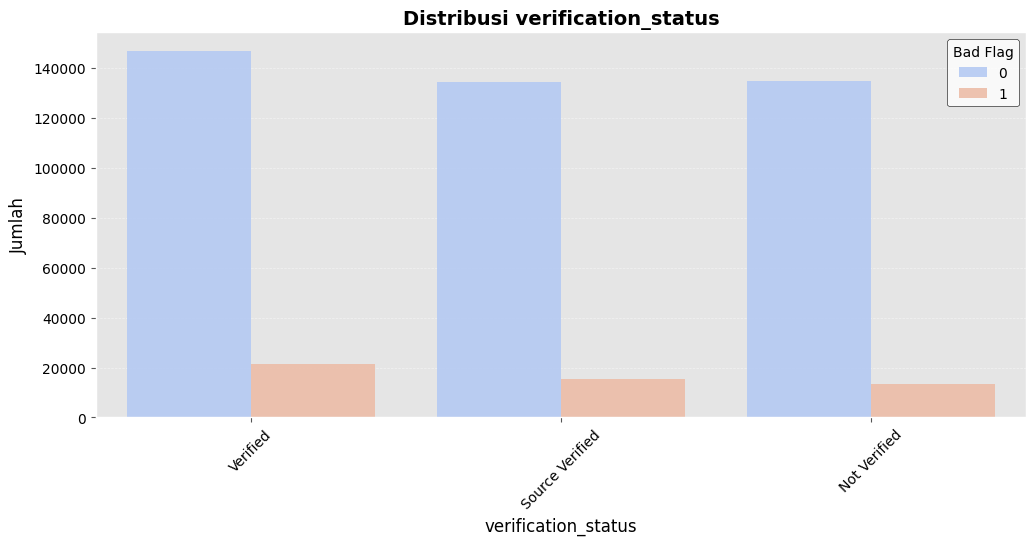

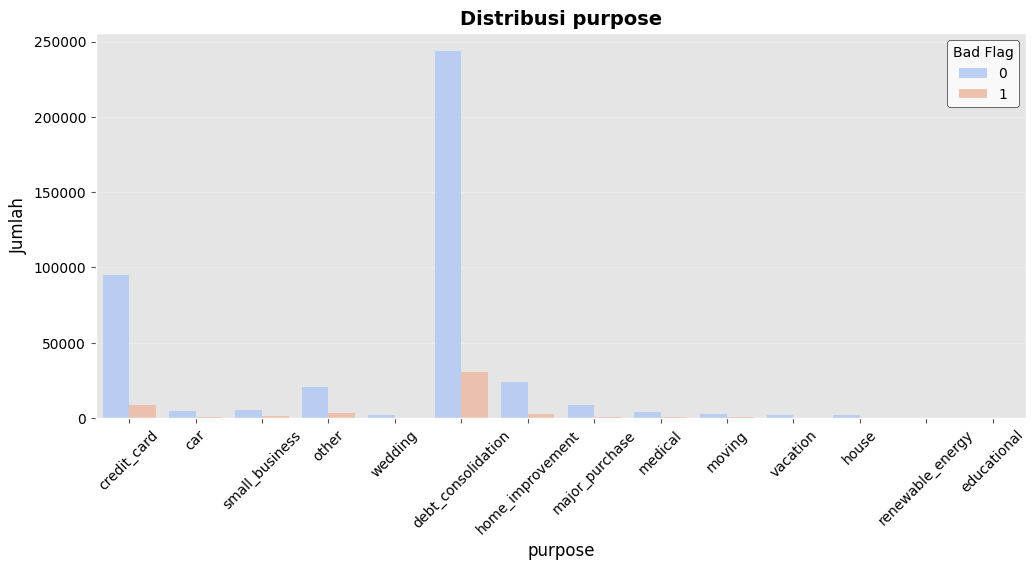

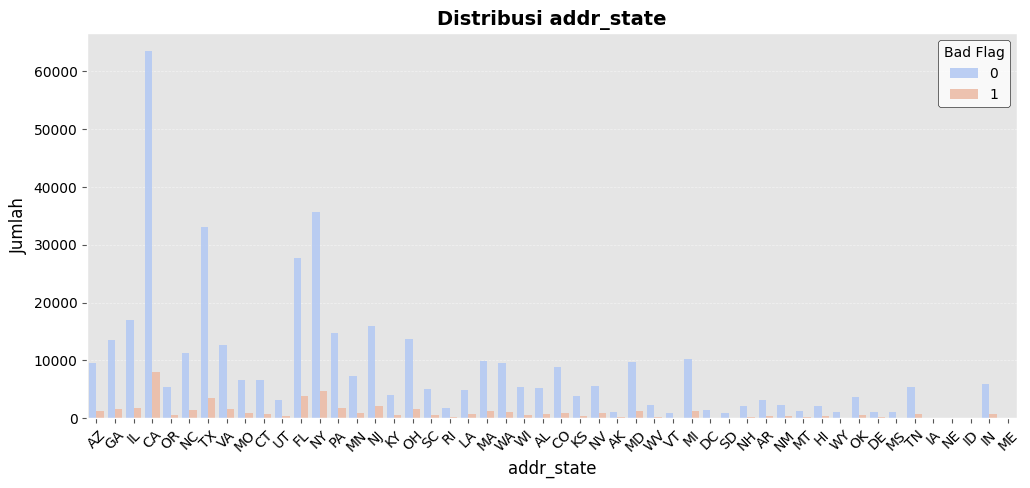

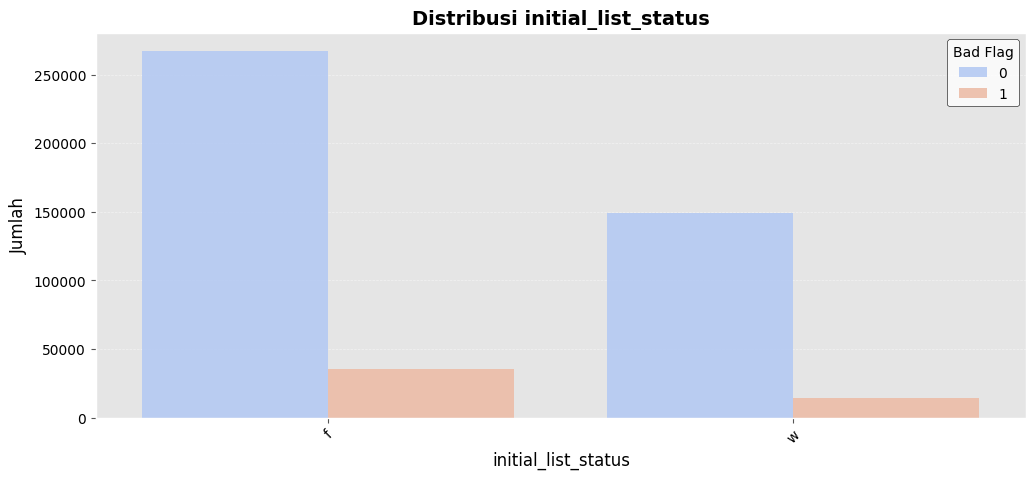

In [129]:
plt.style.use("fast")  
for column in cat_var:
    plt.figure(figsize=(12, 5))  
    sns.countplot(x=df[column], hue=df["bad_flag"], palette="coolwarm", alpha=0.9)
    plt.title(f'Distribusi {column}', fontsize=14, fontweight='bold', color='black')
    plt.xlabel(column, fontsize=12, color='black')
    plt.ylabel('Jumlah', fontsize=12, color='black')
    plt.xticks(rotation=45, fontsize=10, color='black')
    plt.yticks(color='black')
    plt.legend(title="Bad Flag", fontsize=10, facecolor='white', edgecolor='black')

    plt.grid(axis='y', linestyle='--', alpha=0.5)  

    plt.show()

# DATA PREPROCESSING

In [130]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
missing_values = check_missing[check_missing > 0]. sort_values(ascending=False)
print("Percentage Of Missing Value In Each Feature : ")
print(missing_values)

Percentage Of Missing Value In Each Feature : 
emp_length_int                   100.000000
mths_since_last_record            86.566585
mths_since_last_delinq            53.690554
mths_since_next_pymnt_d           48.728567
mths_since_last_pymnt_d            0.080637
revol_util                         0.072917
collections_12_mths_ex_med         0.031097
mths_since_last_credit_pull_d      0.009007
delinq_2yrs                        0.006219
pub_rec                            0.006219
inq_last_6mths                     0.006219
open_acc                           0.006219
acc_now_delinq                     0.006219
total_acc                          0.006219
mths_since_earliest_cr_line        0.006219
annual_inc                         0.000858
dtype: float64


In [131]:
df.drop('mths_since_last_record', axis=1, inplace=True)

In [132]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())
df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].fillna(0)
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)
df['total_acc'] = df['total_acc'].fillna(0)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)
df['revol_util'] = df['revol_util'].fillna(0)
df['emp_length_int'] = df['emp_length_int'].fillna(0)
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

In [133]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var :
    df[column] = label.fit_transform(df[column])

In [134]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,1,5,24000.0,2,1,...,0.0,0.0,0,0.0,36.0,395.0,72,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,2,5,30000.0,1,0,...,0.0,0.0,1,0.0,60.0,224.0,72,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,2,5,12252.0,0,11,...,0.0,0.0,0,0.0,36.0,193.0,72,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,2,5,49200.0,1,9,...,0.0,0.0,0,0.0,36.0,262.0,72,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,1,5,80000.0,1,9,...,0.0,0.0,0,0.0,60.0,263.0,72,23.0,22.0,23.0


In [135]:
from imblearn.over_sampling import SMOTE
X = df.drop('bad_flag', axis=1)
y = df['bad_flag' ]

In [136]:
print(X.isnull().sum())  # Menampilkan jumlah NaN di setiap kolom

loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
int_rate                              0
installment                           0
grade                                 0
home_ownership                        0
annual_inc                            0
verification_status                   0
purpose                               0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq                0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                            0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
total_pymnt                           0
total_pymnt_inv                       0


In [137]:
X = X.dropna()
y = y[X.index]  

In [138]:
oversampling = SMOTE(random_state=12, sampling_strategy=1)

In [139]:
X, y = oversampling.fit_resample(X, y)

In [140]:
y.value_counts()

bad_flag
0    231306
1    231306
Name: count, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape From Data Training :", X_train.shape)
print("Shape From Data Test :", X_test.shape)

Shape From Data Training : (370089, 40)
Shape From Data Test : (92523, 40)


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [143]:
X_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,-0.304570,-0.304097,-0.301072,-0.393686,-0.097722,-0.796767,1.221113,-0.532210,-1.272853,-0.700072,...,-0.105776,-0.104281,-0.077628,0.0,-0.773175,-0.868026,0.029976,-0.384329,-0.099383,-0.080816
1,0.677447,0.678199,0.671164,0.103814,0.198387,0.019558,-1.032891,0.164246,1.380592,-0.196500,...,0.034385,-0.104281,-0.077628,0.0,1.373945,0.671179,1.471794,-0.384329,-0.099383,-0.080816
2,-0.633975,-0.633596,-0.630270,0.460102,-0.415203,0.019558,-1.032891,0.064753,0.053870,0.810644,...,-0.256053,-0.104281,-0.077628,0.0,-0.773175,0.328039,0.991188,-0.384329,0.129875,-0.080816
3,-0.395535,-0.395088,-0.392021,-2.145405,-0.374499,-1.613092,-1.032891,0.741310,-1.272853,-0.196500,...,-0.236786,-0.104281,-0.077628,0.0,-0.773175,-0.529812,-0.931236,-0.384329,-0.099383,-0.080816
4,0.396922,0.397594,0.397495,1.287677,0.166236,0.835884,0.094111,-0.361051,0.053870,-0.196500,...,0.019167,-0.104281,-0.077628,0.0,1.373945,0.109422,1.111340,-0.036851,-0.099383,-0.080816


# DATA MODELLING

In [144]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [145]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test)

# EVALUATION

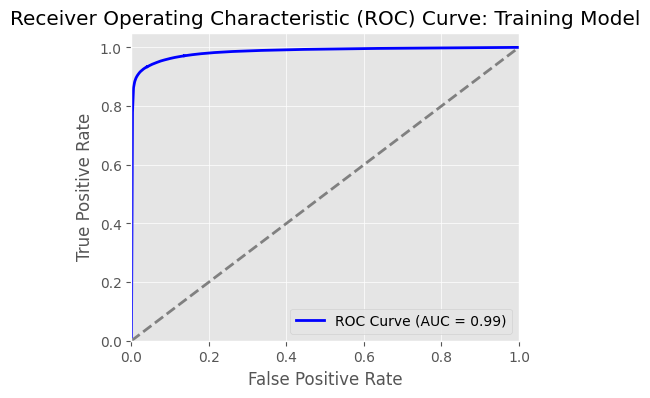

In [146]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = logreg.predict_proba(X_train_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()